<a href="https://colab.research.google.com/github/eemayes2/IE517_F21_HW4/blob/main/IE517_HWK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



The linear model fit on all the variables should have a high R2 and a somewhat large MSE on the in-sample test, but perform less well on the out-of-sample test due to overfitting.  Hopefully Lasso and Ridge will remedy that, although the effect may be hard to see with just a single test-train split.

In [76]:
#Import libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Check if any null values we need to change
def num_missing(x):
    return sum(x.isnull())


In [9]:
#Read in Data
df = pd.read_csv('housing2(2).csv', header=0)
#Reminder: ATT1-13 is noise, MEDV is target variable
df.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,ATT11,ATT12,ATT13,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,0.443212,0.504136,0.998981,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,0.707044,0.723372,0.509493,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,0.763820,0.427700,0.999183,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,0.196689,0.754646,0.157631,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,0.743762,0.365306,0.763755,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
print(df.apply(num_missing, axis = 0))

ATT1       0
ATT2       0
ATT3       0
ATT4       0
ATT5       0
ATT6       0
ATT7       0
ATT8       0
ATT9       0
ATT10      0
ATT11      0
ATT12      0
ATT13      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Part 1: Exploratory Data Analysis

In [114]:
df.iloc[:, 13:].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


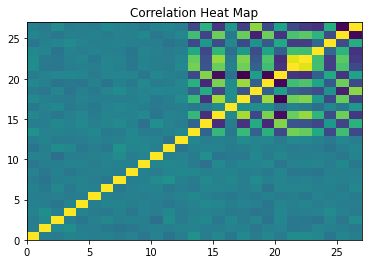

In [16]:
corMat = pd.DataFrame(df.corr())

plt.pcolor(corMat)
plt.title("Correlation Heat Map")
plt.show()

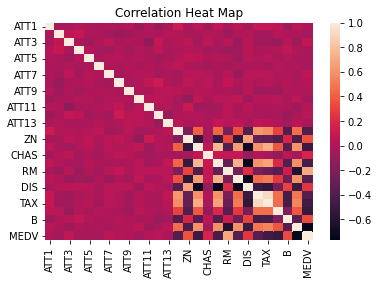

In [20]:
correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = False)
plt.title("Correlation Heat Map")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


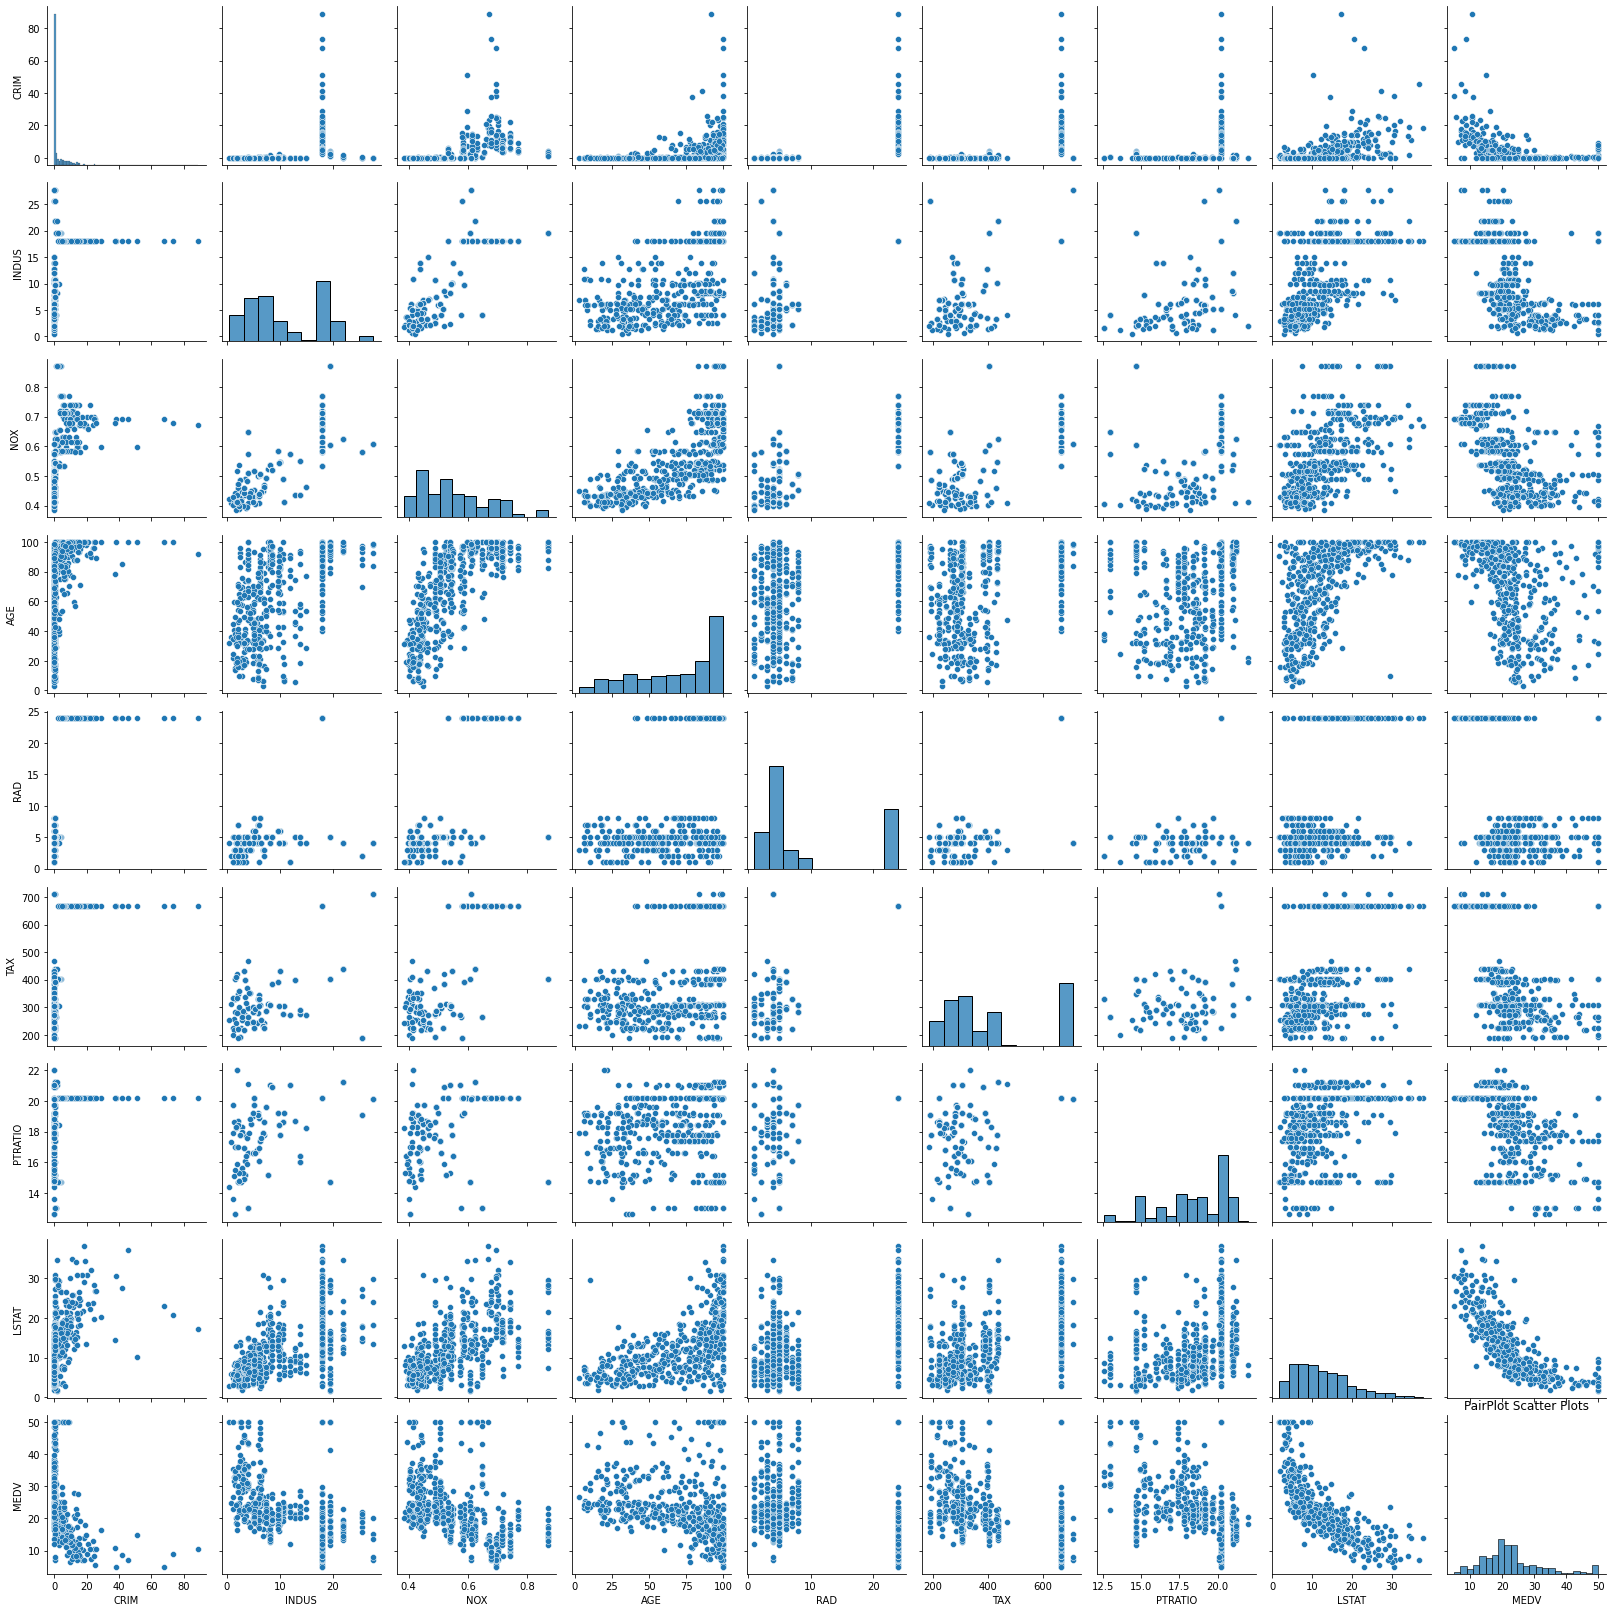

In [21]:
#Use cols most correlated with MEDV
cols = ['CRIM', 'INDUS', 'NOX','AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
sns.pairplot(df[cols], size = 2.5)
plt.tight_layout()
plt.title("PairPlot Scatter Plots")
plt.show()

In [25]:
#Split into training-test sets
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['MEDV'])
x.head()

X_train, X_test, y_train, y_test = train_test_split(x, df['MEDV'], test_size=0.20, random_state=42)


## Part 2: Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
lin_reg = LinearRegression()
lreg = lin_reg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
y_train_pred = lreg.predict(X_train)

print('Intercept = ' + str(lreg.intercept_))
print('Coeffs = ' + str(lreg.coef_))

Intercept = 29.01184117293093
Coeffs = [ 2.89556912e+00 -2.40286871e-01  5.59299658e-01 -1.05366827e-01
 -7.67931626e-01 -6.19536586e-01  6.66791594e-01 -2.79369230e-01
 -1.41197737e-01 -1.01755261e+00 -9.66242999e-01  4.57906074e-01
 -1.32764058e-01 -1.27945481e-01  3.23592942e-02  4.02659544e-02
  2.74293085e+00 -1.70235838e+01  4.48169721e+00 -6.42849583e-03
 -1.47039413e+00  2.56793051e-01 -1.05131783e-02 -8.92191033e-01
  1.30869818e-02 -5.01078827e-01]


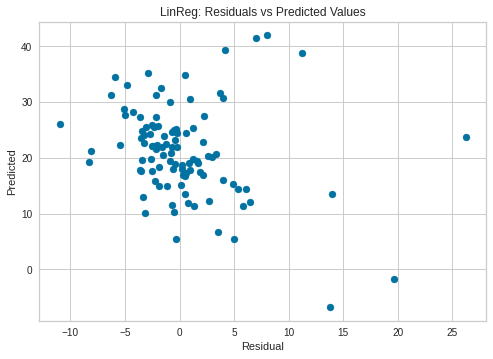

In [147]:
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)
plt.xlabel("Residual")
plt.ylabel("Predicted")
plt.title("LinReg: Residuals vs Predicted Values")
plt.show()

In [148]:
print("Train Score: " + str(lreg.score(X_train, y_train)))
print("Test Score: " + str(lreg.score(X_test, y_test)))
print("Mean Squared Error (MSE): " + str(mean_squared_error(y_test, y_pred)))

print("Train R^2: " + str(r2_score(y_train, y_train_pred)))
print("Test R^2: " + str(r2_score(y_test, y_pred)))

Train Score: 0.762725461446246
Test Score: 0.6368627208821082
Mean Squared Error (MSE): 26.630230484261155
Train R^2: 0.762725461446246
Test R^2: 0.6368627208821082


## Part 3.1: Ridge Regression

In [138]:
import statsmodels.api as sm
parameters = [1e-25, 1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.75, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 10, 20, 30]

ridge = RidgeCV(alphas = parameters, scoring = 'r2')

rreg = ridge.fit(X_train, y_train)
print(rreg.get_params)
print('Best alpha: ' + str(rreg.alpha_))

<bound method BaseEstimator.get_params of RidgeCV(alphas=array([1.0e-25, 1.0e-15, 1.0e-10, 1.0e-08, 1.0e-04, 1.0e-03, 1.0e-02,
       5.0e-02, 1.0e-01, 1.5e-01, 2.0e-01, 2.5e-01, 3.0e-01, 5.0e-01,
       7.5e-01, 1.0e+00, 1.5e+00, 2.0e+00, 2.5e+00, 3.0e+00, 3.5e+00,
       4.0e+00, 4.5e+00, 5.0e+00, 1.0e+01, 2.0e+01, 3.0e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='r2', store_cv_values=False)>
Best alpha: 0.1


In [139]:
ridge_best = Ridge(alpha = rreg.alpha_, normalize = True)
ridge_best.fit(X_train, y_train)


y_pred = ridge_best.predict(X_test)
y_train_pred = ridge_best.predict(X_train)

print('Intercept = ' + str(ridge_best.intercept_))
print('Coeffs = ' + str(ridge_best.coef_))

Intercept = 21.23009987843051
Coeffs = [ 2.53775000e+00 -4.66969023e-01  4.57586547e-01 -1.77850645e-01
 -8.57166974e-01 -4.78641461e-01  7.39065961e-01 -3.04098221e-01
 -2.21596848e-01 -9.66175457e-01 -7.89347361e-01  4.26814409e-01
 -2.34582768e-01 -9.96982632e-02  1.67992880e-02 -2.38166384e-02
  2.98945287e+00 -1.04456466e+01  4.50145609e+00 -6.44787859e-03
 -1.00226582e+00  9.95772909e-02 -4.27301453e-03 -7.82132603e-01
  1.19616595e-02 -4.49305383e-01]


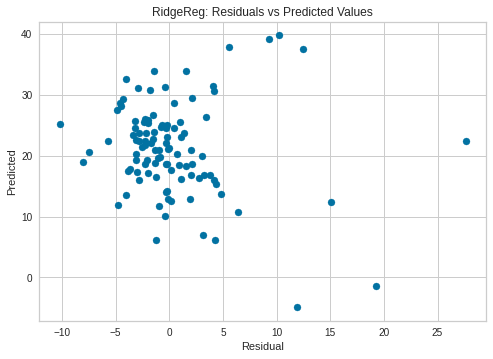

In [140]:
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)
plt.xlabel("Residual")
plt.ylabel("Predicted")
plt.title("RidgeReg: Residuals vs Predicted Values")
plt.show()

In [141]:
print("Train Score: " + str(ridge_best.score(X_train, y_train)))
print("Test Score: " + str(ridge_best.score(X_test, y_test)))

print("Mean Squared Error (MSE): " + str(mean_squared_error(y_test, y_pred)))

print("Train R^2: " + str(r2_score(y_train, y_train_pred)))
print("Test R^2: " + str(r2_score(y_test, y_pred)))

Train Score: 0.754734471040975
Test Score: 0.6339582689284009
Mean Squared Error (MSE): 26.843224934033902
Train R^2: 0.754734471040975
Test R^2: 0.6339582689284009


Part 3.2: LASSO Regression

In [142]:
#find best alpha
lasso_regressor = LassoCV(alphas = parameters).fit(X_train, y_train)

print(lasso_regressor.get_params)
print(lasso_regressor.alpha_)

<bound method BaseEstimator.get_params of LassoCV(alphas=[1e-25, 1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 0.05, 0.1,
                0.15, 0.2, 0.25, 0.3, 0.5, 0.75, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5,
                5, 10, 20, 30],
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)>
0.1


In [143]:
lass_best = Lasso(alpha = lasso_regressor.alpha_, normalize = True)
lass_best.fit(X_train, y_train) 
  
y_pred = lass_best.predict(X_test)
y_train_pred = lass_best.predict(X_train)

print('Intercept = ' + str(lass_best.intercept_))
print('Coeffs = ' + str(lass_best.coef_))

Intercept = 10.719938826593024
Coeffs = [ 0.         -0.          0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
  3.54335167 -0.          0.         -0.         -0.         -0.26526595
  0.         -0.43697906]


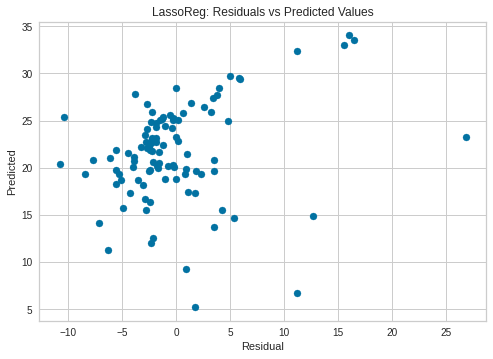

In [144]:
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)
plt.xlabel("Residual")
plt.ylabel("Predicted")
plt.title("LassoReg: Residuals vs Predicted Values")
plt.show()

In [145]:
print("Train Score: " + str(lass_best.score(X_train, y_train)))
print("Test Score: " + str(lass_best.score(X_test, y_test)))

print("Mean Squared Error (MSE): " + str(mean_squared_error(y_test, y_pred)))

print("Train R^2: " + str(r2_score(y_train, y_train_pred)))
print("Test R^2: " + str(r2_score(y_test, y_pred)))

Train Score: 0.6112945565136205
Test Score: 0.5824911941775328
Mean Squared Error (MSE): 30.617500233710192
Train R^2: 0.6112945565136205
Test R^2: 0.5824911941775328


## Integrity Statements

In [1]:
print("My name is Emma Mayes")
print("My NetID is: eemayes2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Emma Mayes
My NetID is: eemayes2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [149]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('IE517_HWK3.ipynb')

--2021-09-17 22:56:47--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-09-17 22:56:47 (13.7 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IE517_HWK3.ipynb to pdf
[NbConvertApp] Support files will be in IE517_HWK3_files/
[NbConvertApp] Making directory ./IE517_HWK3_files
[NbConvertApp] Making directory ./IE517_HWK3_files
[NbConvertApp] Making directory ./IE517_HWK3_files
[NbConvertApp] Making directory ./IE517_HWK3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'